<a href="https://colab.research.google.com/github/chetan-957/Independent-Study/blob/main/2_Bitcoin_Price_Prediction_with_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bitcoin Price Prediction with Sentiment Analysis**

### **📌 Why These Datasets?**
We are using **Bitcoin price data** and **Twitter sentiment data** to analyze whether **public sentiment influences Bitcoin price movements**. By merging **historical price trends** with **social media sentiment**, we can identify patterns and improve Bitcoin price prediction models.

### **📌 What’s in the Datasets?**
1. **Bitcoin Price Data** (`bitcoin_historical_data.csv`):https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data  
   - Contains **timestamped** Bitcoin trading data (Open, High, Low, Close, Volume).
   - Helps analyze **price trends, volatility, and market movements** over the years.

2. **Bitcoin Sentiment Data** (`bitcoin_tweets_sampled.csv`):https://www.kaggle.com/datasets/gautamchettiar/bitcoin-sentiment-analysis-twitter-data?resource=download  
   - Includes Bitcoin-related **tweets** with **sentiment scores** (Positive, Neutral, Negative).
   - Helps understand **public sentiment trends** and their impact on price fluctuations.

By combining these datasets, we can explore **the relationship between social media sentiment and Bitcoin price trends**, helping us build **a predictive model**. 🚀

In [3]:
import gdown
import pandas as pd

# Google Drive file IDs
btc_price_file_id = "11b-dZJOAZ194Gg8m0ojd8CSHIC4S8Iik"
btc_tweets_file_id = "1T35koN9DfF2rdenV7hYsDdB_sdSzjjK6"

# Define output file names
btc_price_output = "bitcoin_historical_data.csv"
btc_tweets_output = "bitcoin_tweets_sampled.csv"

# Download Bitcoin Historical Data
gdown.download(f"https://drive.google.com/uc?id={btc_price_file_id}", btc_price_output, quiet=False)

# Download Bitcoin Tweets Sentiment Data
gdown.download(f"https://drive.google.com/uc?id={btc_tweets_file_id}", btc_tweets_output, quiet=False)

print("✅ Files downloaded successfully!")


Downloading...
From (original): https://drive.google.com/uc?id=11b-dZJOAZ194Gg8m0ojd8CSHIC4S8Iik
From (redirected): https://drive.google.com/uc?id=11b-dZJOAZ194Gg8m0ojd8CSHIC4S8Iik&confirm=t&uuid=8a0e413a-c294-4379-8f89-8097419fb358
To: /content/bitcoin_historical_data.csv
100%|██████████| 352M/352M [00:01<00:00, 237MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1T35koN9DfF2rdenV7hYsDdB_sdSzjjK6
From (redirected): https://drive.google.com/uc?id=1T35koN9DfF2rdenV7hYsDdB_sdSzjjK6&confirm=t&uuid=e91907bb-8bd2-4cd8-a6dd-09e5ffb5c7b6
To: /content/bitcoin_tweets_sampled.csv
100%|██████████| 291M/291M [00:01<00:00, 175MB/s]


✅ Files downloaded successfully!


## **1.Load the Data**



In [4]:
# Define file paths
btc_price_output = "/content/bitcoin_historical_data.csv"
btc_tweets_output = "/content/bitcoin_tweets_sampled.csv"

# Load Bitcoin Price Data (first 50,000 rows for efficiency)
btc_price_data = pd.read_csv(btc_price_output, encoding="latin1")

# Load Bitcoin Tweets Sentiment Data (first 50,000 rows for efficiency)
btc_tweets_data = pd.read_csv(btc_tweets_output, encoding="latin1")


<ipython-input-4-f4098b104141>:9: DtypeWarning: Columns (0,5,6,7,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  btc_tweets_data = pd.read_csv(btc_tweets_output, encoding="latin1")


In [5]:
print("Bitcoin Price Data Overview:")
btc_price_data.info()
btc_price_data.tail()

Bitcoin Price Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769281 entries, 0 to 6769280
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 309.9 MB


,Timestamp,Open,High,Low,Close,Volume
6769276,1.739750e+09,96212.0,96218.0,96204.0,96204.0,0.079045
6769277,1.739750e+09,96191.0,96191.0,96190.0,96190.0,0.002204
6769278,1.739750e+09,96166.0,96166.0,96132.0,96132.0,0.002026
6769279,1.739750e+09,96066.0,96080.0,96060.0,96060.0,0.475466
6769280,NaN,57854.0,57864.0,57835.0,57835.0,1.353466


In [6]:
print("\nBitcoin Tweets Sentiment Data Overview:")
btc_tweets_data.info()
btc_tweets_data.head()



Bitcoin Tweets Sentiment Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        499991 non-null  object 
 1   user_name         499975 non-null  object 
 2   user_location     281768 non-null  object 
 3   user_description  448413 non-null  object 
 4   user_created      499981 non-null  object 
 5   user_followers    499983 non-null  object 
 6   user_friends      499982 non-null  object 
 7   user_favourites   499978 non-null  object 
 8   user_verified     499977 non-null  object 
 9   date              499977 non-null  object 
 10  text              499972 non-null  object 
 11  hashtags          491891 non-null  object 
 12  source            499607 non-null  object 
 13  is_retweet        499949 non-null  object 
 14  cleanText         499959 non-null  object 
 15  Polarity Score    499959 no

,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,cleanText,Polarity Score,sentiment
0,0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,blue ridge bank shares halted nyse bitcoin atm...,0.00,0.0
1,1,CryptoND,NaN,Ã°ÂÂÂ BITCOINLIVE is a Dutch platform aimed...,2019-10-17 20:12:10,6769.0,1532,25483,False,2021-02-10 23:58:48,"Ã°ÂÂÂ Today, that's this #Thursday, we will...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,today thursday take friend leowandersleb btc w...,0.00,0.0
2,2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,2021-02-10 23:54:48,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,guys evening read article btc would like share,0.00,0.0
3,3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,btc big chance billion price bitcoin btc crypto,0.00,0.0
4,4,Alex Kirchmaier Ã°ÂÂÂ¦Ã°ÂÂÂ¹Ã°ÂÂÂ¸Ã°ÂÂ...,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,network secured nodes today soon biggest bears...,-0.25,0.0


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

btc_price_output = "/content/bitcoin_historical_data.csv"

# Load Bitcoin Price Data
btc_price_data = pd.read_csv(btc_price_output, encoding="latin1")

# Convert 'Timestamp' column to datetime
btc_price_data['Date'] = pd.to_datetime(btc_price_data['Timestamp'], unit='s')

# Drop the original 'Timestamp' column
btc_price_data.drop(columns=['Timestamp'], inplace=True)

# Display the first few rows to confirm the conversion
btc_price_data.tail()



,Open,High,Low,Close,Volume,Date
6769276,96212.0,96218.0,96204.0,96204.0,0.079045,2025-02-16 23:57:00
6769277,96191.0,96191.0,96190.0,96190.0,0.002204,2025-02-16 23:58:00
6769278,96166.0,96166.0,96132.0,96132.0,0.002026,2025-02-16 23:59:00
6769279,96066.0,96080.0,96060.0,96060.0,0.475466,2025-02-17 00:00:00
6769280,57854.0,57864.0,57835.0,57835.0,1.353466,NaT


In [8]:
# Extract 'Year' column
btc_price_data['Year'] = btc_price_data['Date'].dt.year

# Separate Date and Time into different columns
btc_price_data['Only_Date'] = btc_price_data['Date'].dt.date  # Extracts only the date (YYYY-MM-DD)
btc_price_data['Only_Time'] = btc_price_data['Date'].dt.time  # Extracts only the time (HH:MM:SS)

# Display first few rows
btc_price_data.head()

,Open,High,Low,Close,Volume,Date,Year,Only_Date,Only_Time
0,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:01:00,2012.0,2012-01-01,10:01:00
1,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:02:00,2012.0,2012-01-01,10:02:00
2,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:03:00,2012.0,2012-01-01,10:03:00
3,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:04:00,2012.0,2012-01-01,10:04:00
4,4.58,4.58,4.58,4.58,0.0,2012-01-01 10:05:00,2012.0,2012-01-01,10:05:00


In [9]:
# Drop the original 'Date' column
btc_price_data.drop(columns=['Date'], inplace=True)

# Rename columns
btc_price_data.rename(columns={'Only_Date': 'Date', 'Only_Time': 'Time'}, inplace=True)

# Display first few rows to confirm changes
btc_price_data.head()


,Open,High,Low,Close,Volume,Year,Date,Time
0,4.58,4.58,4.58,4.58,0.0,2012.0,2012-01-01,10:01:00
1,4.58,4.58,4.58,4.58,0.0,2012.0,2012-01-01,10:02:00
2,4.58,4.58,4.58,4.58,0.0,2012.0,2012-01-01,10:03:00
3,4.58,4.58,4.58,4.58,0.0,2012.0,2012-01-01,10:04:00
4,4.58,4.58,4.58,4.58,0.0,2012.0,2012-01-01,10:05:00


In [10]:
btc_price_data.tail()

,Open,High,Low,Close,Volume,Year,Date,Time
6769276,96212.0,96218.0,96204.0,96204.0,0.079045,2025.0,2025-02-16,23:57:00
6769277,96191.0,96191.0,96190.0,96190.0,0.002204,2025.0,2025-02-16,23:58:00
6769278,96166.0,96166.0,96132.0,96132.0,0.002026,2025.0,2025-02-16,23:59:00
6769279,96066.0,96080.0,96060.0,96060.0,0.475466,2025.0,2025-02-17,00:00:00
6769280,57854.0,57864.0,57835.0,57835.0,1.353466,NaN,NaT,NaT


In [11]:
# Check for missing values in Date and Time
print("Missing values in Date column:", btc_price_data["Date"].isna().sum())
print("Missing values in Time column:", btc_price_data["Time"].isna().sum())

# Drop rows where either Date or Time is missing
btc_price_data = btc_price_data.dropna(subset=["Date", "Time"])

# Convert Date and Time to string before combining
btc_price_data["Date_Time"] = pd.to_datetime(
    btc_price_data["Date"].astype(str) + " " + btc_price_data["Time"].astype(str),
    errors="coerce"  # Ensures invalid values are converted to NaT instead of raising errors
)

# Check if conversion was successful
print(btc_price_data[["Date", "Time", "Date_Time"]].tail())


# Display first few rows to confirm changes
btc_price_data.tail()


Missing values in Date column: 1
Missing values in Time column: 1
               Date      Time           Date_Time
6769275  2025-02-16  23:56:00 2025-02-16 23:56:00
6769276  2025-02-16  23:57:00 2025-02-16 23:57:00
6769277  2025-02-16  23:58:00 2025-02-16 23:58:00
6769278  2025-02-16  23:59:00 2025-02-16 23:59:00
6769279  2025-02-17  00:00:00 2025-02-17 00:00:00


,Open,High,Low,Close,Volume,Year,Date,Time,Date_Time
6769275,96142.0,96218.0,96142.0,96213.0,0.389203,2025.0,2025-02-16,23:56:00,2025-02-16 23:56:00
6769276,96212.0,96218.0,96204.0,96204.0,0.079045,2025.0,2025-02-16,23:57:00,2025-02-16 23:57:00
6769277,96191.0,96191.0,96190.0,96190.0,0.002204,2025.0,2025-02-16,23:58:00,2025-02-16 23:58:00
6769278,96166.0,96166.0,96132.0,96132.0,0.002026,2025.0,2025-02-16,23:59:00,2025-02-16 23:59:00
6769279,96066.0,96080.0,96060.0,96060.0,0.475466,2025.0,2025-02-17,00:00:00,2025-02-17 00:00:00


In [12]:
import pandas as pd

# Define file path
sentiment_data_path = "/content/bitcoin_tweets_sampled.csv"

# Load sentiment data with low_memory=False to avoid mixed dtype warnings
sentiment_data = pd.read_csv(sentiment_data_path, encoding="latin1", low_memory=False)

# Identify non-datetime values (for debugging)
print("Unique values in 'date' column before conversion:", sentiment_data["date"].unique()[:10])

# Convert 'date' column to datetime, forcing errors to NaT
sentiment_data["date"] = pd.to_datetime(sentiment_data["date"], errors='coerce')

# Drop rows where 'date' could not be converted
sentiment_data = sentiment_data.dropna(subset=["date"])

# Extract Year, Date, Time, and Date_Time
sentiment_data["Year"] = sentiment_data["date"].dt.year
sentiment_data["Date"] = sentiment_data["date"].dt.date
sentiment_data["Time"] = sentiment_data["date"].dt.time
sentiment_data["Date_Time"] = sentiment_data["date"]

# Drop original 'date' column (optional)
sentiment_data.drop(columns=["date"], inplace=True)

# Display first few rows
sentiment_data.head()


Unique values in 'date' column before conversion: ['2021-02-10 23:59:04' '2021-02-10 23:58:48' '2021-02-10 23:54:48'
 '2021-02-10 23:54:33' '2021-02-10 23:54:06' '2021-02-10 23:53:30'
 '2021-02-10 23:53:17' '2021-02-10 23:52:42' '2021-02-10 23:52:25'
 '2021-02-10 23:52:08']


<ipython-input-12-209ffb5f2f7e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_data["Year"] = sentiment_data["date"].dt.year


,Unnamed: 0,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,text,hashtags,source,is_retweet,cleanText,Polarity Score,sentiment,Year,Date,Time,Date_Time
0,0,DeSota Wilson,"Atlanta, GA","Biz Consultant, real estate, fintech, startups...",2009-04-26 20:05:09,8534.0,7605,4838,False,Blue Ridge Bank shares halted by NYSE after #b...,['bitcoin'],Twitter Web App,False,blue ridge bank shares halted nyse bitcoin atm...,0.00,0.0,2021,2021-02-10,23:59:04,2021-02-10 23:59:04
1,1,CryptoND,NaN,Ã°ÂÂÂ BITCOINLIVE is a Dutch platform aimed...,2019-10-17 20:12:10,6769.0,1532,25483,False,"Ã°ÂÂÂ Today, that's this #Thursday, we will...","['Thursday', 'Btc', 'wallet', 'security']",Twitter for Android,False,today thursday take friend leowandersleb btc w...,0.00,0.0,2021,2021-02-10,23:58:48,2021-02-10 23:58:48
2,2,Tdlmatias,"London, England","IM Academy : The best #forex, #SelfEducation, ...",2014-11-10 10:50:37,128.0,332,924,False,"Guys evening, I have read this article about B...",NaN,Twitter Web App,False,guys evening read article btc would like share,0.00,0.0,2021,2021-02-10,23:54:48,2021-02-10 23:54:48
3,3,Crypto is the future,NaN,I will post a lot of buying signals for BTC tr...,2019-09-28 16:48:12,625.0,129,14,False,$BTC A big chance in a billion! Price: \487264...,"['Bitcoin', 'FX', 'BTC', 'crypto']",dlvr.it,False,btc big chance billion price bitcoin btc crypto,0.00,0.0,2021,2021-02-10,23:54:33,2021-02-10 23:54:33
4,4,Alex Kirchmaier Ã°ÂÂÂ¦Ã°ÂÂÂ¹Ã°ÂÂÂ¸Ã°ÂÂ...,Europa,Co-founder @RENJERJerky | Forbes 30Under30 | I...,2016-02-03 13:15:55,1249.0,1472,10482,False,This network is secured by 9 508 nodes as of t...,['BTC'],Twitter Web App,False,network secured nodes today soon biggest bears...,-0.25,0.0,2021,2021-02-10,23:54:06,2021-02-10 23:54:06


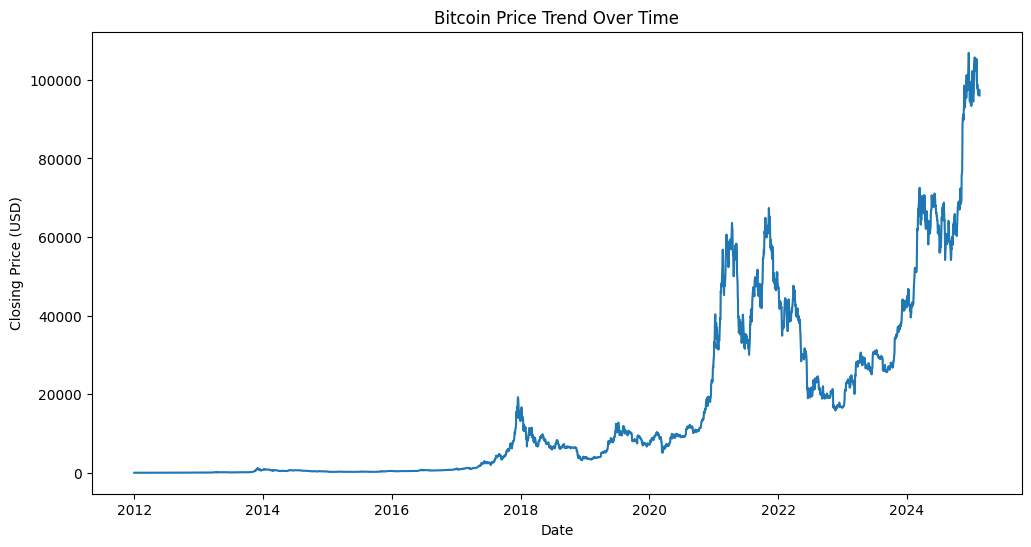

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Bitcoin Price Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x=btc_price_data['Date'], y=btc_price_data['Close'])
plt.title("Bitcoin Price Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.show()


In [14]:
# Check for missing values
print("Missing Values in Bitcoin Price Data:")
print(btc_price_data.isnull().sum())

Missing Values in Bitcoin Price Data:
Open         0
High         0
Low          0
Close        0
Volume       0
Year         0
Date         0
Time         0
Date_Time    0
dtype: int64


In [15]:
# Check for missing values
print("\nMissing Values in Bitcoin Tweets Sentiment Data:")
print(btc_tweets_data.isnull().sum())


Missing Values in Bitcoin Tweets Sentiment Data:
Unnamed: 0               9
user_name               25
user_location       218232
user_description     51587
user_created            19
user_followers          17
user_friends            18
user_favourites         22
user_verified           23
date                    23
text                    28
hashtags              8109
source                 393
is_retweet              51
cleanText               41
Polarity Score          41
sentiment               42
dtype: int64


<ipython-input-16-c800e3eb931d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")


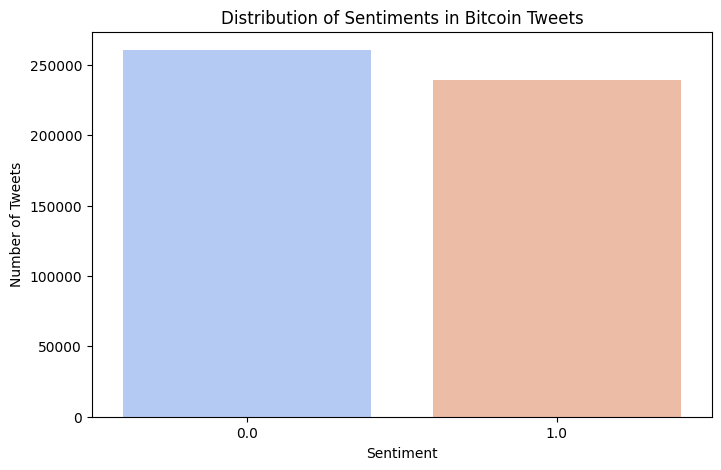

In [16]:
# Count sentiment categories
sentiment_counts = btc_tweets_data["sentiment"].value_counts()

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.title("Distribution of Sentiments in Bitcoin Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()

The bar chart visualizes the distribution of sentiments in Bitcoin-related tweets.

1. **Sentiment Categories**:  
   - The x-axis represents the sentiment categories, where:
     - `0` likely represents negative or neutral sentiment.
     - `1` represents positive sentiment.
   
2. **Tweet Count**:  
   - The y-axis shows the number of tweets in each sentiment category.
   - The height of the bars indicates the count of tweets classified under each sentiment.

3. **Comparison**:  
   - The chart suggests that there are slightly more tweets classified as sentiment `0` (negative/neutral) than those classified as sentiment `1` (positive).
   - While both sentiment categories have a large number of tweets, the difference is not drastic, indicating a fairly balanced distribution.

### Key Insight:
- Bitcoin-related discussions on Twitter contain a mix of positive and negative/neutral sentiments.
- There is a slight dominance of negative/neutral sentiment tweets, which might indicate skepticism, criticism, or discussions about market volatility.

This distribution can be further analyzed to determine if sentiment trends influence Bitcoin’s price movement.

<Figure size 1200x600 with 0 Axes>

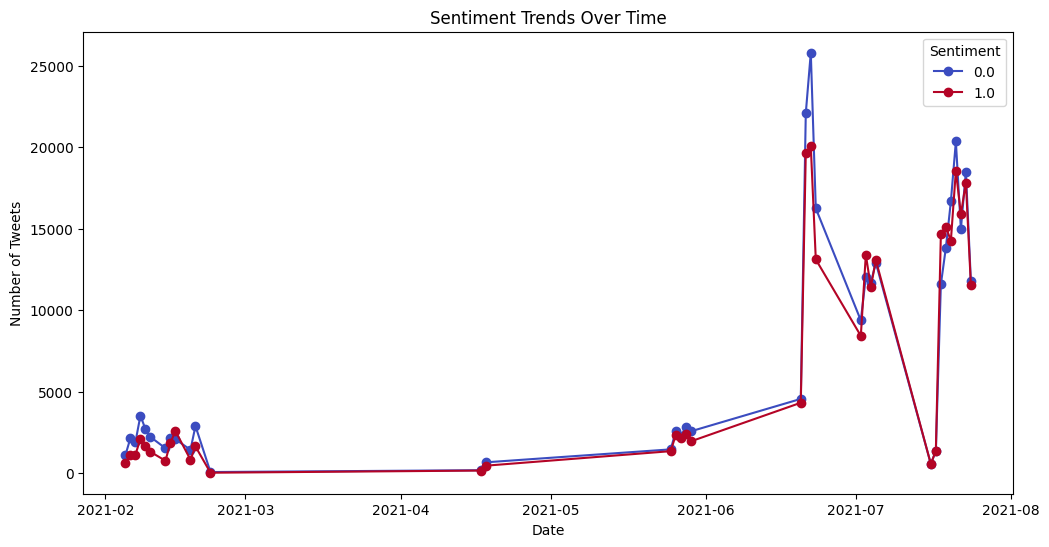

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate sentiment counts per day
daily_sentiment = sentiment_data.groupby(["Date", "sentiment"]).size().unstack()

# Plot sentiment trends over time
plt.figure(figsize=(12, 6))
daily_sentiment.plot(kind="line", marker="o", figsize=(12, 6), colormap="coolwarm")
plt.title("Sentiment Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.legend(title="Sentiment")
plt.show()




1. **Time-Series Representation**:  
   - The x-axis represents the date range from February 2021 to August 2021.
   - The y-axis shows the number of Bitcoin-related tweets categorized by sentiment.

2. **Sentiment Categories**:  
   - Two lines represent different sentiment categories:
     - **Blue Line (0.0)**: Represents neutral/negative sentiment tweets.
     - **Red Line (1.0)**: Represents positive sentiment tweets.

3. **Trend Observations**:  
   - There was **low tweet activity** between March and early May 2021.
   - A **gradual increase** in tweet volume started in late May.
   - **A major spike** occurred in June 2021, with both positive and negative sentiment tweets peaking. This could correspond to significant Bitcoin market events, such as major price movements or regulatory news.
   - The sentiment trends for positive and negative tweets are closely aligned, indicating that both types of discussions surged simultaneously.
   - After the peak in June, tweet activity showed **fluctuations** with another **notable increase in July 2021**, followed by a sharp dip and then another rise in late July.

4. **Potential Insights**:
   - The major spikes suggest that **Bitcoin sentiment on Twitter is highly event-driven**.
   - Both **positive and negative sentiments increase together**, implying that significant Bitcoin events generate both optimism and criticism.
   - The **drop in sentiment tweets in late July** may indicate reduced public interest or market stabilization.

This analysis can be further refined by correlating these sentiment trends with Bitcoin price movements to determine if sentiment influences price fluctuations.

In [18]:
import pandas as pd

# Define file path
sentiment_file_path = "/content/bitcoin_tweets_sampled.csv"  # Adjust path if needed

# Read the dataset
btc_tweets_sample = pd.read_csv(sentiment_file_path, encoding="latin1")

# Display unique values in the sentiment column
print(btc_tweets_sample["sentiment"].value_counts())


sentiment
0.0    260439
1.0    239519
Name: count, dtype: int64


<ipython-input-18-3fade6397345>:7: DtypeWarning: Columns (0,5,6,7,8,13) have mixed types. Specify dtype option on import or set low_memory=False.
  btc_tweets_sample = pd.read_csv(sentiment_file_path, encoding="latin1")


From the output, it looks like the **sentiment column** is encoded as follows:

- `0.0` → **Negative sentiment** (2,60,439 tweets)
- `1.0` → **Positive sentiment** (2,39,519 tweets)



In [19]:
# Check for missing values in Date and Time
print("Missing values in Date column:", btc_price_data["Date"].isna().sum())
print("Missing values in Time column:", btc_price_data["Time"].isna().sum())

# Drop rows where either Date or Time is missing
btc_price_data = btc_price_data.dropna(subset=["Date", "Time"])

# Convert Date and Time to string before combining
btc_price_data["Date_Time"] = pd.to_datetime(
    btc_price_data["Date"].astype(str) + " " + btc_price_data["Time"].astype(str),
    errors="coerce"  # Ensures invalid values are converted to NaT instead of raising errors
)

# Check if conversion was successful
print(btc_price_data[["Date", "Time", "Date_Time"]].tail())


# Display first few rows to confirm changes
btc_price_data.tail()

Missing values in Date column: 0
Missing values in Time column: 0
               Date      Time           Date_Time
6769275  2025-02-16  23:56:00 2025-02-16 23:56:00
6769276  2025-02-16  23:57:00 2025-02-16 23:57:00
6769277  2025-02-16  23:58:00 2025-02-16 23:58:00
6769278  2025-02-16  23:59:00 2025-02-16 23:59:00
6769279  2025-02-17  00:00:00 2025-02-17 00:00:00


,Open,High,Low,Close,Volume,Year,Date,Time,Date_Time
6769275,96142.0,96218.0,96142.0,96213.0,0.389203,2025.0,2025-02-16,23:56:00,2025-02-16 23:56:00
6769276,96212.0,96218.0,96204.0,96204.0,0.079045,2025.0,2025-02-16,23:57:00,2025-02-16 23:57:00
6769277,96191.0,96191.0,96190.0,96190.0,0.002204,2025.0,2025-02-16,23:58:00,2025-02-16 23:58:00
6769278,96166.0,96166.0,96132.0,96132.0,0.002026,2025.0,2025-02-16,23:59:00,2025-02-16 23:59:00
6769279,96066.0,96080.0,96060.0,96060.0,0.475466,2025.0,2025-02-17,00:00:00,2025-02-17 00:00:00


In [20]:
print("Bitcoin price data columns:", btc_price_data.columns)
print("Sentiment data columns:", sentiment_data.columns)



Bitcoin price data columns: Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Year', 'Date', 'Time',
       'Date_Time'],
      dtype='object')
Sentiment data columns: Index(['Unnamed: 0', 'user_name', 'user_location', 'user_description',
       'user_created', 'user_followers', 'user_friends', 'user_favourites',
       'user_verified', 'text', 'hashtags', 'source', 'is_retweet',
       'cleanText', 'Polarity Score', 'sentiment', 'Year', 'Date', 'Time',
       'Date_Time'],
      dtype='object')


In [22]:
# Check first available date in sentiment data
print("First sentiment data available on:", sentiment_data["Date"].min())

# Filter Bitcoin price data to start from the first available sentiment date
btc_price_filtered = btc_price_data[btc_price_data["Date"] >= sentiment_data["Date"].min()]

# Aggregate Sentiment Data to Data Level
sentiment_agg = sentiment_data.groupby("Date").agg(
    Total_Positive_Tweets=("sentiment", "sum"),  # Total number of positive tweets (1s)
    Total_Tweets=("sentiment", "count")  # Total number of tweets (0s + 1s)
).reset_index()

# Calculate Total Negative Tweets
sentiment_agg["Total_Negative_Tweets"] = sentiment_agg["Total_Tweets"] - sentiment_agg["Total_Positive_Tweets"]

# Merge filtered Bitcoin price data with sentiment data
merged_data = pd.merge(btc_price_filtered, sentiment_agg, on="Date", how="outer")

# Sort by Date
merged_data = merged_data.sort_values(by="Date")

# Display first few rows
merged_data.head()


First sentiment data available on: 2021-02-05


,Open,High,Low,Close,Volume,Year,Date,Time,Date_Time,Total_Positive_Tweets,Total_Tweets,Total_Negative_Tweets
0,37200.00,37276.80,37200.00,37251.45,6.750443,2021.0,2021-02-05,00:00:00,2021-02-05 00:00:00,595.0,1693.0,1098.0
964,37494.84,37498.69,37485.56,37496.60,0.672122,2021.0,2021-02-05,16:04:00,2021-02-05 16:04:00,595.0,1693.0,1098.0
963,37543.01,37543.26,37522.01,37543.26,3.374350,2021.0,2021-02-05,16:03:00,2021-02-05 16:03:00,595.0,1693.0,1098.0
962,37578.81,37582.49,37541.85,37541.85,1.351620,2021.0,2021-02-05,16:02:00,2021-02-05 16:02:00,595.0,1693.0,1098.0
961,37553.94,37564.57,37553.47,37564.57,1.732400,2021.0,2021-02-05,16:01:00,2021-02-05 16:01:00,595.0,1693.0,1098.0


In [25]:
# Ensure 'Date' is in correct format
btc_price_data["Date"] = pd.to_datetime(btc_price_data["Date"]).dt.date
sentiment_agg["Date"] = pd.to_datetime(sentiment_agg["Date"]).dt.date

# Filter Bitcoin price data to start from the first available sentiment date
btc_price_filtered = btc_price_data[btc_price_data["Date"] >= sentiment_agg["Date"].min()]

# Perform an outer merge to keep all dates
merged_data = pd.merge(btc_price_filtered, sentiment_agg, on="Date", how="outer")

# Sort by Date
merged_data = merged_data.sort_values(by="Date")

# Display first few rows
merged_data.head()


,Open,High,Low,Close,Volume,Year,Date,Time,Date_Time,Total_Positive_Tweets,Total_Tweets,Total_Negative_Tweets
0,37200.00,37276.80,37200.00,37251.45,6.750443,2021.0,2021-02-05,00:00:00,2021-02-05 00:00:00,595.0,1693.0,1098.0
964,37494.84,37498.69,37485.56,37496.60,0.672122,2021.0,2021-02-05,16:04:00,2021-02-05 16:04:00,595.0,1693.0,1098.0
963,37543.01,37543.26,37522.01,37543.26,3.374350,2021.0,2021-02-05,16:03:00,2021-02-05 16:03:00,595.0,1693.0,1098.0
962,37578.81,37582.49,37541.85,37541.85,1.351620,2021.0,2021-02-05,16:02:00,2021-02-05 16:02:00,595.0,1693.0,1098.0
961,37553.94,37564.57,37553.47,37564.57,1.732400,2021.0,2021-02-05,16:01:00,2021-02-05 16:01:00,595.0,1693.0,1098.0


In [27]:
print("First available date in Bitcoin price data:", btc_price_data["Date"].min())


First available date in Bitcoin price data: 2012-01-01


In [30]:
# Find first available sentiment date
start_date = sentiment_agg["Date"].min()

# Filter Bitcoin price data from the first available sentiment date
btc_price_filtered = btc_price_data[btc_price_data["Date"] >= start_date]

# Merge Bitcoin price data with sentiment data
merged_data = pd.merge(btc_price_filtered, sentiment_agg, on="Date", how="outer")

# Sort by Date
merged_data = merged_data.sort_values(by="Date")

# Display first few rows
merged_data.head()


,Open,High,Low,Close,Volume,Year,Date,Time,Date_Time,Total_Positive_Tweets,Total_Tweets,Total_Negative_Tweets
0,37200.00,37276.80,37200.00,37251.45,6.750443,2021.0,2021-02-05,00:00:00,2021-02-05 00:00:00,595.0,1693.0,1098.0
964,37494.84,37498.69,37485.56,37496.60,0.672122,2021.0,2021-02-05,16:04:00,2021-02-05 16:04:00,595.0,1693.0,1098.0
963,37543.01,37543.26,37522.01,37543.26,3.374350,2021.0,2021-02-05,16:03:00,2021-02-05 16:03:00,595.0,1693.0,1098.0
962,37578.81,37582.49,37541.85,37541.85,1.351620,2021.0,2021-02-05,16:02:00,2021-02-05 16:02:00,595.0,1693.0,1098.0
961,37553.94,37564.57,37553.47,37564.57,1.732400,2021.0,2021-02-05,16:01:00,2021-02-05 16:01:00,595.0,1693.0,1098.0


In [31]:
print("Latest available Bitcoin price date:", btc_price_data["Date"].max())
print("Earliest available Bitcoin price date:", btc_price_data["Date"].min())


Latest available Bitcoin price date: 2025-02-17
Earliest available Bitcoin price date: 2012-01-01


### **IMPORTING YAHOO FINANCE**

In [32]:
import yfinance as yf
import pandas as pd

# Download Bitcoin price data from 2021 onwards
btc_price_data = yf.download("BTC-USD", start="2021-02-05", end="2024-01-01")

# Reset index to have 'Date' as a column
btc_price_data.reset_index(inplace=True)

# Keep only required columns
btc_price_data = btc_price_data[["Date", "Open", "High", "Low", "Close", "Volume"]]

# Save the new data to a CSV file
btc_price_data.to_csv("updated_bitcoin_price.csv", index=False)

# Display first few rows
btc_price_data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Date,Open,High,Low,Close,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,58598066402
1,2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,71326033653
2,2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,65500641143
3,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,101467222687
4,2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,91809846886


In [33]:
import yfinance as yf
import pandas as pd

# Download Bitcoin price data for the last 15 years (from 2009)
btc_price_data = yf.download("BTC-USD", start="2009-01-01", end="2024-02-01")

# Reset index to have 'Date' as a column
btc_price_data.reset_index(inplace=True)

# Keep only required columns
btc_price_data = btc_price_data[["Date", "Open", "High", "Low", "Close", "Volume"]]

# Save the new data to a CSV file
btc_price_data.to_csv("updated_bitcoin_price.csv", index=False)

# Display first few rows
btc_price_data.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,Open,High,Low,Close,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100


In [34]:
print("Bitcoin Price Data Index:", btc_price_data.index.names)
print("Sentiment Data Index:", sentiment_data.index.names)


Bitcoin Price Data Index: [None]
Sentiment Data Index: [None]


In [35]:
print("Bitcoin Price Data 'Date' dtype:", btc_price_data["Date"].dtype)
print("Sentiment Data 'Date' dtype:", sentiment_data["Date"].dtype)


Bitcoin Price Data 'Date' dtype: datetime64[ns]
Sentiment Data 'Date' dtype: object


In [36]:
print("Bitcoin Price Data Columns:", btc_price_data.columns)
print("Sentiment Data Columns:", sentiment_data.columns)



Bitcoin Price Data Columns: MultiIndex([(  'Date',        ''),
            (  'Open', 'BTC-USD'),
            (  'High', 'BTC-USD'),
            (   'Low', 'BTC-USD'),
            ( 'Close', 'BTC-USD'),
            ('Volume', 'BTC-USD')],
           names=['Price', 'Ticker'])
Sentiment Data Columns: Index(['Unnamed: 0', 'user_name', 'user_location', 'user_description',
       'user_created', 'user_followers', 'user_friends', 'user_favourites',
       'user_verified', 'text', 'hashtags', 'source', 'is_retweet',
       'cleanText', 'Polarity Score', 'sentiment', 'Year', 'Date', 'Time',
       'Date_Time'],
      dtype='object')


In [37]:
# Flatten MultiIndex by combining levels and removing extra hierarchy
btc_price_data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in btc_price_data.columns]

# Rename columns properly
btc_price_data.rename(columns={
    "Date_": "Date",  # Fix Date column name
    "Open_BTC-USD": "Open",
    "High_BTC-USD": "High",
    "Low_BTC-USD": "Low",
    "Close_BTC-USD": "Close",
    "Volume_BTC-USD": "Volume"
}, inplace=True)

# Display fixed column names
print("Fixed Bitcoin Price Data Columns:", btc_price_data.columns)


Fixed Bitcoin Price Data Columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [38]:
print("Sentiment Data Columns:", sentiment_data.columns)



Sentiment Data Columns: Index(['Unnamed: 0', 'user_name', 'user_location', 'user_description',
       'user_created', 'user_followers', 'user_friends', 'user_favourites',
       'user_verified', 'text', 'hashtags', 'source', 'is_retweet',
       'cleanText', 'Polarity Score', 'sentiment', 'Year', 'Date', 'Time',
       'Date_Time'],
      dtype='object')


In [39]:
# Ensure 'Date' column is in correct format
sentiment_data["Date"] = pd.to_datetime(sentiment_data["Date"], errors='coerce').dt.date

# Aggregate sentiment data
sentiment_agg = sentiment_data.groupby("Date").agg(
    Total_Positive_Tweets=("sentiment", "sum"),  # Total positive tweets per day (1s)
    Total_Tweets=("sentiment", "count")  # Total tweets per day (0s + 1s)
).reset_index()

# Calculate Total Negative Tweets
sentiment_agg["Total_Negative_Tweets"] = sentiment_agg["Total_Tweets"] - sentiment_agg["Total_Positive_Tweets"]

# Display first few rows
print(sentiment_agg.head())


         Date  Total_Positive_Tweets  Total_Tweets  Total_Negative_Tweets
0  2021-02-05                  595.0          1693                 1098.0
1  2021-02-06                 1123.0          3277                 2154.0
2  2021-02-07                 1126.0          3028                 1902.0
3  2021-02-08                 2113.0          5644                 3531.0
4  2021-02-09                 1655.0          4348                 2693.0


#### **MERGING 1- with Twitter Sentiment Data**

In [40]:
# Convert 'Date' columns to datetime format in both datasets
btc_price_data["Date"] = pd.to_datetime(btc_price_data["Date"]).dt.date
sentiment_agg["Date"] = pd.to_datetime(sentiment_agg["Date"]).dt.date

# Merge Bitcoin price data with the fixed sentiment data using outer join
merged_data = pd.merge(btc_price_data, sentiment_agg, on="Date", how="outer")

# Fill missing sentiment data with 0 (neutral assumption)
merged_data["Total_Positive_Tweets"].fillna(0, inplace=True)
merged_data["Total_Negative_Tweets"].fillna(0, inplace=True)
merged_data["Total_Tweets"].fillna(0, inplace=True)

# Sort by Date
merged_data = merged_data.sort_values(by="Date")

# Display first few rows
print(merged_data.head())


         Date        Open        High         Low       Close    Volume  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  21056800   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  34483200   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  37919700   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  36863600   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  26580100   

   Total_Positive_Tweets  Total_Tweets  Total_Negative_Tweets  
0                    0.0           0.0                    0.0  
1                    0.0           0.0                    0.0  
2                    0.0           0.0                    0.0  
3                    0.0           0.0                    0.0  
4                    0.0           0.0                    0.0  


<ipython-input-40-470803370c95>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data["Total_Positive_Tweets"].fillna(0, inplace=True)
<ipython-input-40-470803370c95>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

In [41]:
# Properly filling NaN values using .loc[] to avoid FutureWarning
merged_data.loc[:, "Total_Positive_Tweets"] = merged_data["Total_Positive_Tweets"].fillna(0)
merged_data.loc[:, "Total_Negative_Tweets"] = merged_data["Total_Negative_Tweets"].fillna(0)
merged_data.loc[:, "Total_Tweets"] = merged_data["Total_Tweets"].fillna(0)

# Display first few rows
print(merged_data.head())


         Date        Open        High         Low       Close    Volume  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  21056800   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  34483200   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  37919700   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  36863600   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  26580100   

   Total_Positive_Tweets  Total_Tweets  Total_Negative_Tweets  
0                    0.0           0.0                    0.0  
1                    0.0           0.0                    0.0  
2                    0.0           0.0                    0.0  
3                    0.0           0.0                    0.0  
4                    0.0           0.0                    0.0  


In [42]:
print(sentiment_data[["Date", "sentiment"]].groupby("Date").count().tail(10))


            sentiment
Date                 
2021-07-05      25981
2021-07-16       1110
2021-07-17       2754
2021-07-18      26239
2021-07-19      28931
2021-07-20      30927
2021-07-21      38911
2021-07-22      30833
2021-07-23      36330
2021-07-24      23309


In [43]:
print("Earliest Bitcoin Price Date:", btc_price_data["Date"].min())
print("Latest Bitcoin Price Date:", btc_price_data["Date"].max())

print("Earliest Sentiment Date:", sentiment_data["Date"].min())
print("Latest Sentiment Date:", sentiment_data["Date"].max())


Earliest Bitcoin Price Date: 2014-09-17
Latest Bitcoin Price Date: 2024-01-31
Earliest Sentiment Date: 2021-02-05
Latest Sentiment Date: 2021-07-24


In [44]:
# Ensure 'Date' is in correct format
btc_price_data["Date"] = pd.to_datetime(btc_price_data["Date"]).dt.date
sentiment_data["Date"] = pd.to_datetime(sentiment_data["Date"]).dt.date

# Keep only Bitcoin price data within sentiment date range
btc_price_filtered = btc_price_data[
    (btc_price_data["Date"] >= sentiment_data["Date"].min()) &
    (btc_price_data["Date"] <= sentiment_data["Date"].max())
]

# Display first few rows
print(btc_price_filtered.head())


            Date          Open          High           Low         Close  \
2333  2021-02-05  36931.546875  38225.906250  36658.761719  38144.308594   
2334  2021-02-06  38138.386719  40846.546875  38138.386719  39266.011719   
2335  2021-02-07  39250.191406  39621.835938  37446.152344  38903.441406   
2336  2021-02-08  38886.828125  46203.929688  38076.324219  46196.464844   
2337  2021-02-09  46184.992188  48003.722656  45166.960938  46481.105469   

            Volume  
2333   58598066402  
2334   71326033653  
2335   65500641143  
2336  101467222687  
2337   91809846886  


In [45]:
print("Sentiment Data Columns:", sentiment_data.columns)


Sentiment Data Columns: Index(['Unnamed: 0', 'user_name', 'user_location', 'user_description',
       'user_created', 'user_followers', 'user_friends', 'user_favourites',
       'user_verified', 'text', 'hashtags', 'source', 'is_retweet',
       'cleanText', 'Polarity Score', 'sentiment', 'Year', 'Date', 'Time',
       'Date_Time'],
      dtype='object')


In [46]:
# Ensure 'Date' column is properly formatted
sentiment_data["Date"] = pd.to_datetime(sentiment_data["Date"], errors='coerce').dt.date

# Aggregate sentiment data again to make sure required columns exist
sentiment_agg = sentiment_data.groupby("Date").agg(
    Total_Positive_Tweets=("sentiment", lambda x: (x == 1).sum()),  # Count positive tweets
    Total_Tweets=("sentiment", "count")  # Count total tweets
).reset_index()

# Calculate total negative tweets
sentiment_agg["Total_Negative_Tweets"] = sentiment_agg["Total_Tweets"] - sentiment_agg["Total_Positive_Tweets"]

# Display first few rows
print(sentiment_agg.head())


         Date  Total_Positive_Tweets  Total_Tweets  Total_Negative_Tweets
0  2021-02-05                    595          1693                   1098
1  2021-02-06                   1123          3277                   2154
2  2021-02-07                   1126          3028                   1902
3  2021-02-08                   2113          5644                   3531
4  2021-02-09                   1655          4348                   2693


#### **MERGING 1 Again**

In [47]:
# Merge Bitcoin price data with the newly aggregated sentiment data
merged_data = pd.merge(btc_price_filtered, sentiment_agg, on="Date", how="outer")

# Fill missing sentiment values with 0
if "Total_Positive_Tweets" in merged_data.columns:
    merged_data[["Total_Positive_Tweets", "Total_Negative_Tweets", "Total_Tweets"]] = (
        merged_data[["Total_Positive_Tweets", "Total_Negative_Tweets", "Total_Tweets"]].fillna(0)
    )
else:
    print("Error: Sentiment columns are still missing!")

# Sort by Date
merged_data = merged_data.sort_values(by="Date")

# Display first few rows
print(merged_data.head())


         Date          Open          High           Low         Close  \
0  2021-02-05  36931.546875  38225.906250  36658.761719  38144.308594   
1  2021-02-06  38138.386719  40846.546875  38138.386719  39266.011719   
2  2021-02-07  39250.191406  39621.835938  37446.152344  38903.441406   
3  2021-02-08  38886.828125  46203.929688  38076.324219  46196.464844   
4  2021-02-09  46184.992188  48003.722656  45166.960938  46481.105469   

         Volume  Total_Positive_Tweets  Total_Tweets  Total_Negative_Tweets  
0   58598066402                  595.0        1693.0                 1098.0  
1   71326033653                 1123.0        3277.0                 2154.0  
2   65500641143                 1126.0        3028.0                 1902.0  
3  101467222687                 2113.0        5644.0                 3531.0  
4   91809846886                 1655.0        4348.0                 2693.0  


### **REDDIT API**

In [48]:
pip install praw


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 4.7 MB/s eta 0:00:00


In [49]:
pip install asyncpraw


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 8.0 MB/s eta 0:00:00


#### **Reddit Aunthentication**

In [50]:
import praw

# Test Reddit API Authentication
reddit = praw.Reddit(
    client_id="aKIB5ORY_FfgqNhpgF5L0Q",
    client_secret="5aBCciPhWW580VKNe1xVWga5yq5yZA",
    user_agent="BitcoinSentimentAnalysis",
    username="Intelligent_Neck6761",
    password="Kakarot@2403"
)

# Test API Connection
try:
    print("Authenticated as:", reddit.user.me())
except Exception as e:
    print("Authentication failed:", e)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Authenticated as: Intelligent_Neck6761


In [51]:
import praw

# Reddit API Authentication Test
reddit = praw.Reddit(
    client_id="aKIB5ORY_FfgqNhpgF5L0Q",
    client_secret="5aBCciPhWW580VKNe1xVWga5yq5yZA",
    user_agent="BitcoinSentimentAnalysis",
    username="Intelligent_Neck6761",
    password="Kakarot@2403"
)

# Test API Connection
try:
    print("Authenticated as:", reddit.user.me())  # Should print your username
    subreddit = reddit.subreddit("Bitcoin")
    print("Subreddit:", subreddit.display_name)  # Should print "Bitcoin"
except Exception as e:
    print("Authentication failed:", e)



It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Authenticated as: Intelligent_Neck6761
Subreddit: Bitcoin


#### **Extracting from Reddit**

In [52]:
import praw
import pandas as pd
from datetime import datetime

# Reddit API Authentication (Now working)
reddit = praw.Reddit(
    client_id="aKIB5ORY_FfgqNhpgF5L0Q",
    client_secret="5aBCciPhWW580VKNe1xVWga5yq5yZA",
    user_agent="BitcoinSentimentAnalysis",
    username="Intelligent_Neck6761",
    password="Kakarot@2403"
)

# Select subreddit
subreddit = reddit.subreddit("Bitcoin")

# Define date range
start_date = datetime(2021, 2, 5)
end_date = datetime(2021, 7, 24)

# Store posts
posts = []

# Fetch top posts in the date range
for post in subreddit.top(limit=1000):  # Adjust limit if needed
    post_date = datetime.utcfromtimestamp(post.created_utc).date()
    if start_date.date() <= post_date <= end_date.date():
        posts.append({
            "Date": post_date,
            "Title": post.title,
            "Text": post.selftext,
            "Score": post.score,
            "Comments": post.num_comments
        })

# Convert to DataFrame
reddit_data = pd.DataFrame(posts)

# Aggregate Reddit discussion count per day
reddit_agg = reddit_data.groupby("Date").agg(
    Total_Reddit_Posts=("Title", "count"),
    Avg_Score=("Score", "mean"),
    Avg_Comments=("Comments", "mean")
).reset_index()

# Display first few rows
reddit_agg.head()


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/l

,Date,Total_Reddit_Posts,Avg_Score,Avg_Comments
0,2021-02-05,1,4478.000000,316.000000
1,2021-02-06,1,4188.000000,373.000000
2,2021-02-07,3,8083.000000,493.666667
3,2021-02-08,3,20813.666667,1272.000000
4,2021-02-09,2,5931.000000,387.000000


#### **MERGING 2**

Merging **reddit data** with the previously merged data (Merge1)

In [53]:
# Merge Reddit data with the main dataset
merged_data = merged_data.merge(reddit_agg, on="Date", how="outer")

# Fill missing Reddit values with 0
merged_data[["Total_Reddit_Posts", "Avg_Score", "Avg_Comments"]] = (
    merged_data[["Total_Reddit_Posts", "Avg_Score", "Avg_Comments"]].fillna(0)
)

# Display first few rows
merged_data.head()


,Date,Open,High,Low,Close,Volume,Total_Positive_Tweets,Total_Tweets,Total_Negative_Tweets,Total_Reddit_Posts,Avg_Score,Avg_Comments
0,2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,58598066402,595.0,1693.0,1098.0,1.0,4478.000000,316.000000
1,2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,71326033653,1123.0,3277.0,2154.0,1.0,4188.000000,373.000000
2,2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,65500641143,1126.0,3028.0,1902.0,3.0,8083.000000,493.666667
3,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,101467222687,2113.0,5644.0,3531.0,3.0,20813.666667,1272.000000
4,2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,91809846886,1655.0,4348.0,2693.0,2.0,5931.000000,387.000000


#### **GOOGLE TRENDS CSV**

In [54]:
import pandas as pd

# Define the GitHub raw CSV link
url = "https://raw.githubusercontent.com/chetan-957/Independent-Study/main/multiTimeline.csv"

# Read CSV file from GitHub
google_trends_raw = pd.read_csv(url)

# Print the first few rows
google_trends_raw.head()



,Category: All categories
Day,Bitcoin: (Worldwide)
2021-02-05,26
2021-02-06,31
2021-02-07,28
2021-02-08,60


#### **Saving the Google Csv file into Collab**

In [55]:
import requests

# Define the raw GitHub link
url = "https://raw.githubusercontent.com/chetan-957/Independent-Study/main/multiTimeline.csv"

# Send a GET request to download the CSV content
response = requests.get(url)

# Save the content as a CSV file
with open("/content/multiTimeline.csv", "wb") as file:
    file.write(response.content)

# Confirm the file has been saved
print("CSV file saved as /content/multiTimeline.csv")


CSV file saved as /content/multiTimeline.csv


In [56]:
import pandas as pd

# Read the CSV file from the given path, skipping the first row (header issue)
google_trends_raw = pd.read_csv("/content/multiTimeline.csv", skiprows=1)

# Rename columns as required
google_trends_raw.rename(columns={"Day": "Date", "Bitcoin: (Worldwide)": "Google_Search_Interest"}, inplace=True)

# Display the first few rows to confirm the change
google_trends_raw.head()



,Date,Google_Search_Interest
0,2021-02-05,26
1,2021-02-06,31
2,2021-02-07,28
3,2021-02-08,60
4,2021-02-09,72


In [57]:
# Merge Google Trends data with the existing merged dataset (Bitcoin price, sentiment, and Reddit data)
final_merged_data = merged_data.merge(google_trends_raw[["Date", "Google_Search_Interest"]], on="Date", how="outer")

# Fill missing Google Trends values with 0 (assuming no search interest)
final_merged_data["Google_Search_Interest"].fillna(0, inplace=True)

# Display the final merged dataset
final_merged_data.head()


<ipython-input-57-e5765b846e4d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_merged_data["Google_Search_Interest"].fillna(0, inplace=True)


,Date,Open,High,Low,Close,Volume,Total_Positive_Tweets,Total_Tweets,Total_Negative_Tweets,Total_Reddit_Posts,Avg_Score,Avg_Comments,Google_Search_Interest
0,2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,5.859807e+10,595.0,1693.0,1098.0,1.0,4478.000000,316.000000,0.0
1,2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,7.132603e+10,1123.0,3277.0,2154.0,1.0,4188.000000,373.000000,0.0
2,2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,6.550064e+10,1126.0,3028.0,1902.0,3.0,8083.000000,493.666667,0.0
3,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,1.014672e+11,2113.0,5644.0,3531.0,3.0,20813.666667,1272.000000,0.0
4,2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,9.180985e+10,1655.0,4348.0,2693.0,2.0,5931.000000,387.000000,0.0


In [58]:
# Check the first few rows of Google Trends data
print(google_trends_raw.head())

# Check if the 'Date' column in Google Trends data is in the same format
print(google_trends_raw["Date"].dtype)


         Date  Google_Search_Interest
0  2021-02-05                      26
1  2021-02-06                      31
2  2021-02-07                      28
3  2021-02-08                      60
4  2021-02-09                      72
object


In [59]:
# Convert 'Date' columns to datetime format
merged_data["Date"] = pd.to_datetime(merged_data["Date"]).dt.date
google_trends_raw["Date"] = pd.to_datetime(google_trends_raw["Date"]).dt.date

# Merge Google Trends data with the existing merged dataset (Bitcoin, Sentiment, Reddit)
final_merged_data = merged_data.merge(google_trends_raw[["Date", "Google_Search_Interest"]], on="Date", how="outer")

# Fill missing Google Trends values with 0 (assuming no search interest)
final_merged_data["Google_Search_Interest"].fillna(0, inplace=True)

# Display the final merged data
print(final_merged_data.head())


         Date          Open          High           Low         Close  \
0  2021-02-05  36931.546875  38225.906250  36658.761719  38144.308594   
1  2021-02-06  38138.386719  40846.546875  38138.386719  39266.011719   
2  2021-02-07  39250.191406  39621.835938  37446.152344  38903.441406   
3  2021-02-08  38886.828125  46203.929688  38076.324219  46196.464844   
4  2021-02-09  46184.992188  48003.722656  45166.960938  46481.105469   

         Volume  Total_Positive_Tweets  Total_Tweets  Total_Negative_Tweets  \
0   58598066402                  595.0        1693.0                 1098.0   
1   71326033653                 1123.0        3277.0                 2154.0   
2   65500641143                 1126.0        3028.0                 1902.0   
3  101467222687                 2113.0        5644.0                 3531.0   
4   91809846886                 1655.0        4348.0                 2693.0   

   Total_Reddit_Posts     Avg_Score  Avg_Comments  Google_Search_Interest  
0         

<ipython-input-59-57ef224063a7>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_merged_data["Google_Search_Interest"].fillna(0, inplace=True)


In [60]:
final_merged_data["Google_Search_Interest"].fillna(0, inplace=True)


<ipython-input-60-2383f8650ff6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_merged_data["Google_Search_Interest"].fillna(0, inplace=True)


In [61]:
# Fix for FutureWarning
final_merged_data.loc[:, "Google_Search_Interest"] = final_merged_data["Google_Search_Interest"].fillna(0)


In [62]:
final_merged_data.to_csv("/content/final_merged_data.csv", index=False)


In [63]:
final_merged_data.head()

,Date,Open,High,Low,Close,Volume,Total_Positive_Tweets,Total_Tweets,Total_Negative_Tweets,Total_Reddit_Posts,Avg_Score,Avg_Comments,Google_Search_Interest
0,2021-02-05,36931.546875,38225.906250,36658.761719,38144.308594,58598066402,595.0,1693.0,1098.0,1.0,4478.000000,316.000000,26
1,2021-02-06,38138.386719,40846.546875,38138.386719,39266.011719,71326033653,1123.0,3277.0,2154.0,1.0,4188.000000,373.000000,31
2,2021-02-07,39250.191406,39621.835938,37446.152344,38903.441406,65500641143,1126.0,3028.0,1902.0,3.0,8083.000000,493.666667,28
3,2021-02-08,38886.828125,46203.929688,38076.324219,46196.464844,101467222687,2113.0,5644.0,3531.0,3.0,20813.666667,1272.000000,60
4,2021-02-09,46184.992188,48003.722656,45166.960938,46481.105469,91809846886,1655.0,4348.0,2693.0,2.0,5931.000000,387.000000,72


In [64]:
final_merged_data.tail()

,Date,Open,High,Low,Close,Volume,Total_Positive_Tweets,Total_Tweets,Total_Negative_Tweets,Total_Reddit_Posts,Avg_Score,Avg_Comments,Google_Search_Interest
165,2021-07-20,30838.285156,31006.187500,29360.955078,29807.347656,23148267245,14260.0,30927.0,16667.0,0.0,0.0,0.0,25
166,2021-07-21,29796.285156,32752.326172,29526.183594,32110.693359,28203024559,18560.0,38911.0,20351.0,0.0,0.0,0.0,23
167,2021-07-22,32138.873047,32576.400391,31745.298828,32313.105469,19555230518,15872.0,30833.0,14961.0,1.0,3484.0,273.0,21
168,2021-07-23,32305.958984,33581.550781,32057.892578,33581.550781,22552046192,17830.0,36330.0,18500.0,0.0,0.0,0.0,18
169,2021-07-24,33593.730469,34490.390625,33424.859375,34292.445312,21664706865,11534.0,23309.0,11775.0,1.0,3492.0,309.0,18


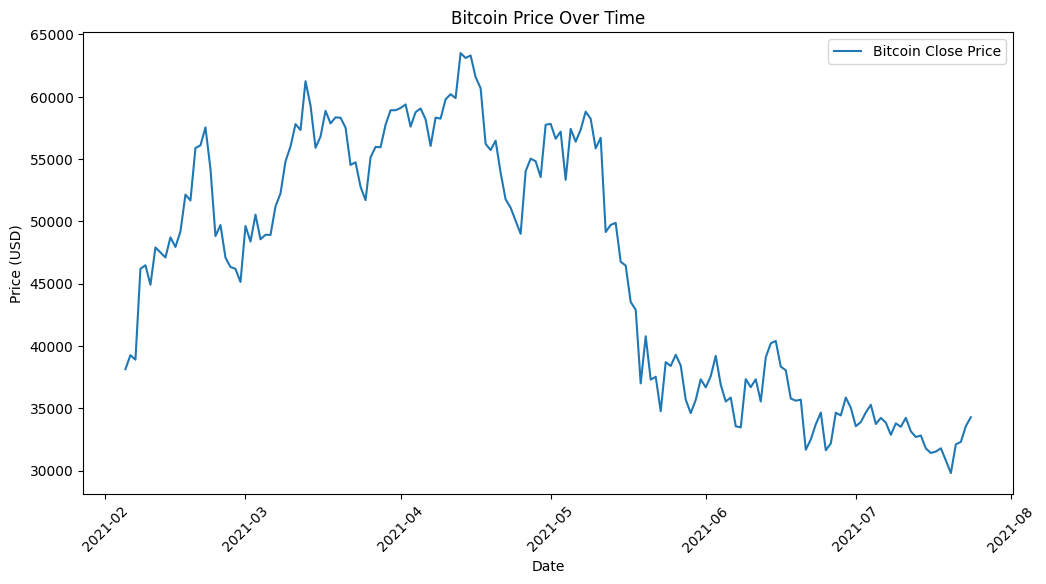

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Bitcoin Price over Time
plt.figure(figsize=(12, 6))
plt.plot(final_merged_data["Date"], final_merged_data["Close"], label="Bitcoin Close Price")
plt.title("Bitcoin Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(rotation=45)
plt.legend()
plt.show()






1. **Time-Series Representation**:  
   - The x-axis represents the date range from February 2021 to August 2021.
   - The y-axis shows the closing price of Bitcoin in USD.

2. **Trend Observations**:  
   **Early 2021 (Feb – Apr)**: Bitcoin experienced a strong uptrend, reaching a peak above **$60,000** in **April 2021**.

   **May 2021 Crash**: A sharp decline followed, likely influenced by external market factors such as regulatory news or significant sell-offs.

   **Mid-2021 (Jun – Jul)**: The price continued to decline, hitting a low near **$30,000**, showing a significant correction from its peak.

   **Late Recovery (July – Aug)**: Bitcoin started showing signs of a small recovery.

3. **Key Insights**:
   - The steep rise in early 2021 indicates **strong investor interest and bullish sentiment**.
   - The **mid-year crash aligns with major sentiment shifts**, possibly due to negative news like China's crackdown on crypto mining or Tesla’s stance on Bitcoin payments.
   - The late **stabilization and recovery suggest renewed interest** or market consolidation.


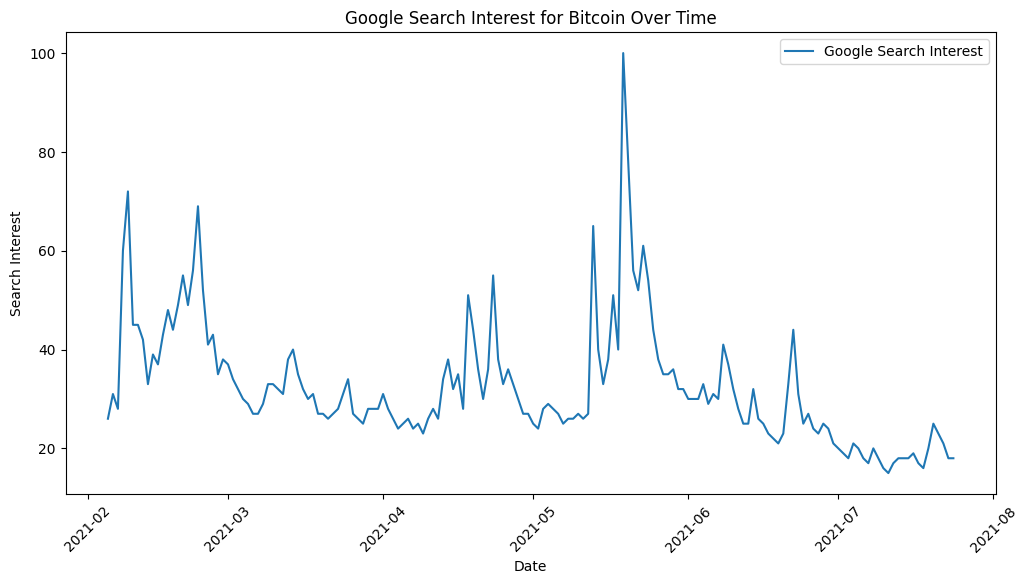

In [66]:
# Plot Google Search Interest over Time
plt.figure(figsize=(12, 6))
plt.plot(final_merged_data["Date"], final_merged_data["Google_Search_Interest"], label="Google Search Interest")
plt.title("Google Search Interest for Bitcoin Over Time")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.xticks(rotation=45)
plt.legend()
plt.show()



1. **Time-Series Representation**:  
   - The x-axis represents the date range from **February 2021 to August 2021**.
   - The y-axis shows **Google Search Interest**, which represents how frequently people searched for "Bitcoin" on Google over time (scaled from 0 to 100).

2. **Trend Observations**:  
   - **Early 2021 (Feb – Mar)**:  
     - There was a **sharp increase in search interest**, suggesting growing public curiosity and investor interest in Bitcoin.  
     - Peaks align with Bitcoin’s price surge, indicating that more people were searching when prices were rising.
   - **Mid 2021 (April – May)**:  
     - Interest fluctuated with multiple spikes, possibly related to Bitcoin hitting its **all-time high (~$64,000 in April 2021)**.  
   - **May 2021 Peak & Drop**:  
     - A **huge spike in early May** coincides with major events like Elon Musk’s statements on Bitcoin and China’s crackdown on crypto mining.
     - After this peak, search interest **declined**, indicating reduced public attention as Bitcoin’s price dropped.
   - **Late 2021 (Jun – Jul)**:  
     - The trend shows **gradual decline with periodic surges**, possibly influenced by market corrections or renewed media attention.

3. **Key Insights**:  
   - Bitcoin’s **Google search trends closely follow price trends**, suggesting that retail investors and the general public show increased interest **during price surges and major news events**.
   - A **sharp drop in search interest after May** aligns with **Bitcoin’s price crash**, suggesting that hype and retail engagement declined.
   - Comparing this with **sentiment analysis** and **Bitcoin price trends** can reveal whether **higher search interest precedes price spikes**.



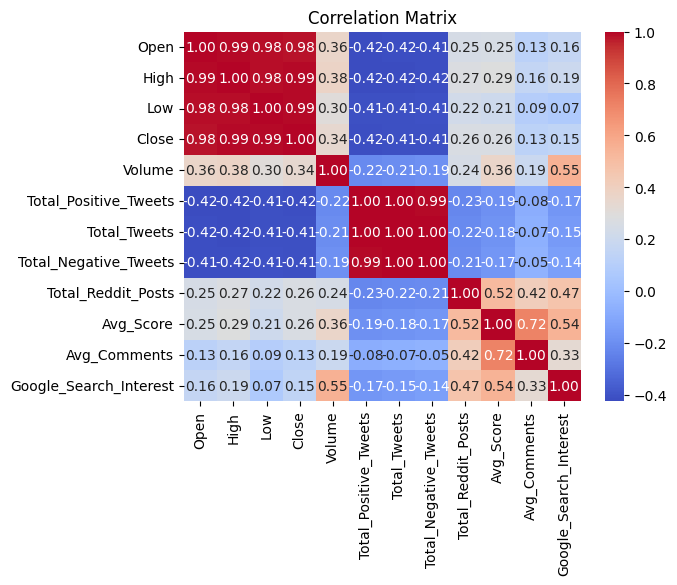

In [67]:
# Drop non-numeric columns (like Date)
numeric_data = final_merged_data.select_dtypes(include=["number"])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap of the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Matrix")
plt.show()





1. **Understanding the Heatmap**:  
   - The heatmap displays **correlation coefficients** between numerical variables in the dataset.
   - The color scale:
     - **Red (1.0 to 0.5)** → Strong positive correlation.
     - **Blue (-1.0 to -0.5)** → Strong negative correlation.
     - **White/Gray (0.5 to -0.5)** → Weak or no correlation.

2. **Key Observations**:  

   **Bitcoin Price vs. Other Variables**:
   - `Open`, `High`, `Low`, and `Close` prices are **highly correlated** (close to **1.00**), which is expected since they represent different price points of the same asset.
   - `Volume` has a weak correlation (**0.34**) with closing price, meaning **trading volume doesn’t strongly influence price movements**.
   - `Google_Search_Interest` has a **weak positive correlation (~0.16) with price**, suggesting that search interest alone doesn’t drive Bitcoin prices directly.

   **Sentiment & Social Media vs. Bitcoin Price**:
   - `Total_Positive_Tweets`, `Total_Negative_Tweets`, and `Total_Tweets` all show **moderate negative correlation (~ -0.42) with Bitcoin prices**, indicating that increased tweet volume (both positive & negative) may **occur during price drops**.
   - `Total_Reddit_Posts` has a weak correlation (~ -0.23) with Bitcoin price, meaning Reddit discussions are less predictive of price changes.

   **Google Search Interest & Social Sentiment**:
   - `Google_Search_Interest` is **positively correlated (0.55) with Total_Positive_Tweets**, meaning that **as people search for Bitcoin more, positive discussions on Twitter increase**.
   - `Google_Search_Interest` also correlates **(0.47) with Total_Reddit_Posts**, showing that Bitcoin-related searches and Reddit discussions often rise together.

   **Other Social Media Metrics**:
   - `Avg_Score` and `Avg_Comments` (potential Reddit engagement metrics) are **moderately correlated (0.72)** with `Total_Reddit_Posts`, meaning more posts tend to receive higher engagement.

**Key Insights**:
- **Social media activity (tweets & Reddit posts) tends to spike when Bitcoin prices fall**, indicating possible fear-driven discussions.
- **Google Search Interest correlates positively with positive tweets and Reddit activity**, suggesting that more searches often align with increased public discussions.
- **Bitcoin trading volume does not strongly impact price movements**, indicating price changes are **driven more by external market events** than just trading activity.



#### **Correlation Analysis between Google Search Interest and Bitcoin Price:**

In [68]:
# Calculate the correlation between Google Search Interest and Bitcoin Price (Close price)
google_search_vs_price_corr = final_merged_data["Google_Search_Interest"].corr(final_merged_data["Close"])

# Print the correlation coefficient
print(f"Correlation between Google Search Interest and Bitcoin Price: {google_search_vs_price_corr:.2f}")


Correlation between Google Search Interest and Bitcoin Price: 0.15


 A value closer to 1 means a strong positive correlation, while a value closer to -1 indicates a negative correlation.

#### **Compare Google Search Interest with Sentiment Trends**

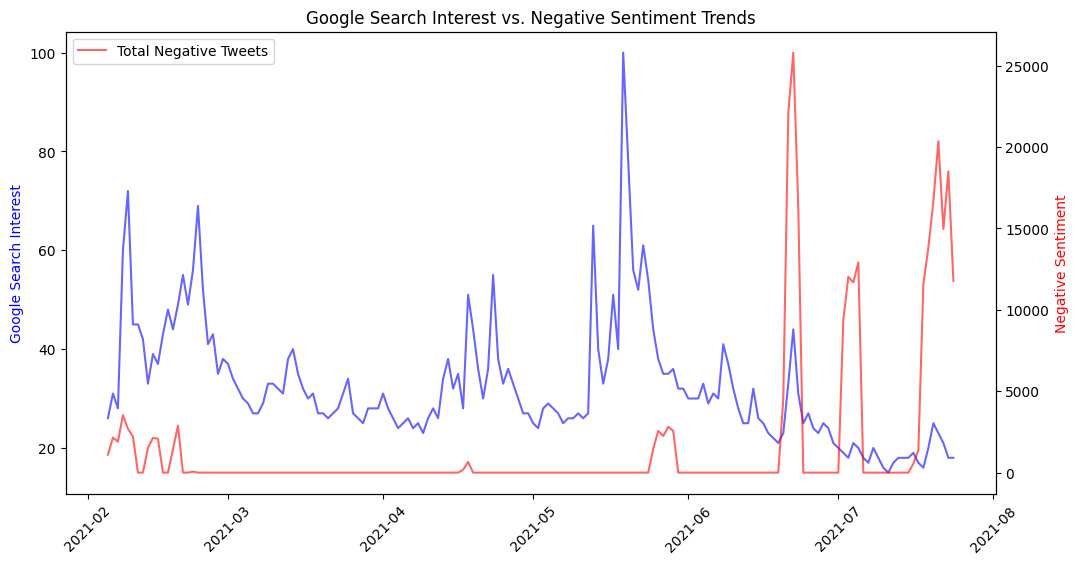

In [69]:
import matplotlib.pyplot as plt

# Plot Google Search Interest and Negative Sentiment Trends
plt.figure(figsize=(12, 6))

# Plot Google Search Interest (on the left y-axis)
plt.plot(final_merged_data["Date"], final_merged_data["Google_Search_Interest"], label="Google Search Interest", color='b', alpha=0.6)
plt.ylabel("Google Search Interest", color='b')
plt.xticks(rotation=45)

# Plot Total Negative Tweets (on the right y-axis)
plt.twinx()  # Create another y-axis sharing the same x-axis
plt.plot(final_merged_data["Date"], final_merged_data["Total_Negative_Tweets"], label="Total Negative Tweets", color='r', alpha=0.6)
plt.ylabel("Negative Sentiment", color='r')

# Add title and legend
plt.title("Google Search Interest vs. Negative Sentiment Trends")
plt.legend(loc="upper left")

plt.show()




1. **Two Y-Axes Representation**:
   - The **blue line (left y-axis)** represents **Google Search Interest** for Bitcoin over time.
   - The **red line (right y-axis)** represents **Total Negative Tweets (Negative Sentiment)**.

2. **Trend Observations**:
   - **Early 2021 (Feb - Apr)**:
     - Google Search Interest **peaked in February and March**, aligning with Bitcoin's price surge.
     - Negative sentiment had **small spikes**, but remained relatively low.
   - **Mid-2021 (May - June)**:
     - Search interest **fluctuated but showed declines**, suggesting reduced curiosity or excitement around Bitcoin.
     - Negative sentiment **spiked sharply in late June**, potentially due to Bitcoin's market crash and regulatory news.
   - **Late 2021 (July - Aug)**:
     - Search interest **continued declining**, possibly indicating lower retail engagement.
     - Negative sentiment **remained volatile**, suggesting increased fear and uncertainty in the market.

3. **Key Insights**:
   - **Negative sentiment spikes appear after significant price drops**, aligning with fear-driven discussions on social media.
   - **Google Search Interest trends align more closely with Bitcoin hype cycles**, peaking during bullish market phases and fading during downturns.
   - The **large spike in negative tweets in late June-July** may correspond to **a major market crash or regulatory news**, leading to widespread fear-driven discussions.



#### **Correlation between Google Search Interest and Sentiment**

In [70]:
# Calculate the correlation between Google Search Interest and Total Negative Tweets
google_search_vs_neg_sentiment_corr = final_merged_data["Google_Search_Interest"].corr(final_merged_data["Total_Negative_Tweets"])

# Print the correlation coefficient
print(f"Correlation between Google Search Interest and Negative Sentiment: {google_search_vs_neg_sentiment_corr:.2f}")


Correlation between Google Search Interest and Negative Sentiment: -0.14


This gave a correlation coefficient between Google Search Interest and Negative Sentiment (Total Negative Tweets).
A high positive correlation indicates that higher search interest tends to correlate with higher negative sentiment, possibly indicating fear-driven reactions.

#### **Google Search Interest vs. Bitcoin Price with Sentiment**

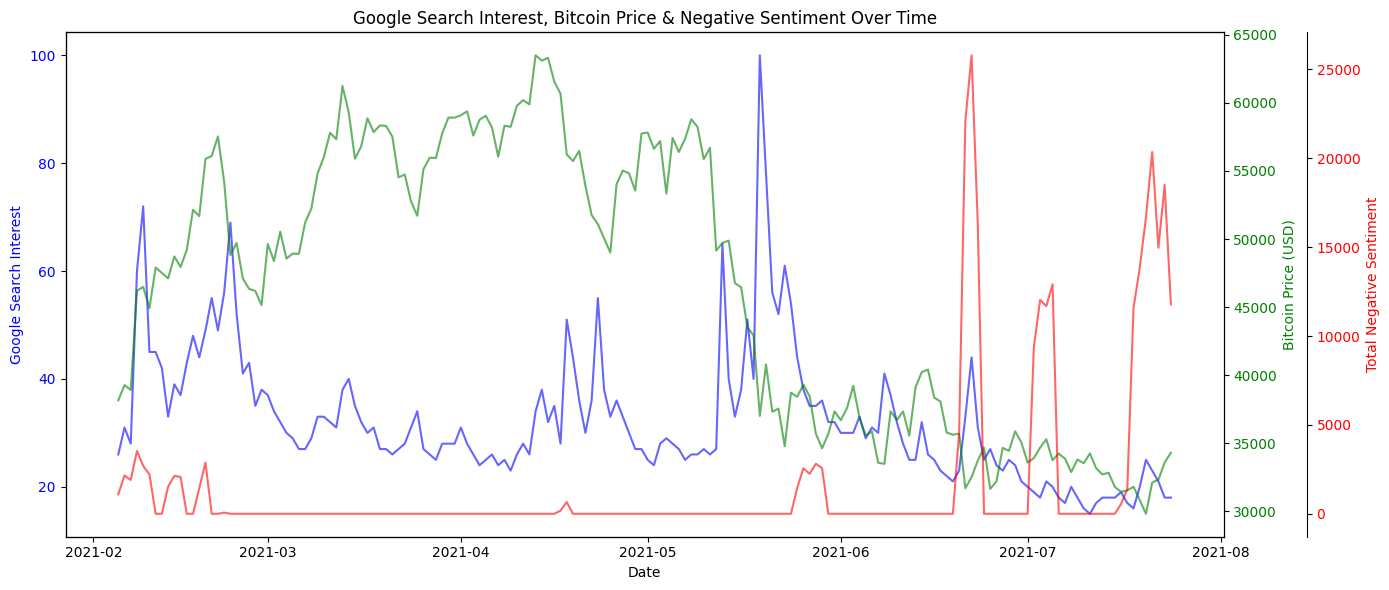

In [71]:
# Create a combined plot for Google Search Interest, Bitcoin Price, and Negative Sentiment
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot Google Search Interest (on the first y-axis)
ax1.set_xlabel("Date")
ax1.set_ylabel("Google Search Interest", color='b')
ax1.plot(final_merged_data["Date"], final_merged_data["Google_Search_Interest"], label="Google Search Interest", color='b', alpha=0.6)
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for Bitcoin price and negative sentiment
ax2 = ax1.twinx()
ax2.set_ylabel("Bitcoin Price (USD)", color='g')
ax2.plot(final_merged_data["Date"], final_merged_data["Close"], label="Bitcoin Price", color='g', alpha=0.6)
ax2.tick_params(axis='y', labelcolor='g')

# Create a third y-axis for Total Negative Sentiment
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Adjust the position of the third y-axis
ax3.set_ylabel("Total Negative Sentiment", color='r')
ax3.plot(final_merged_data["Date"], final_merged_data["Total_Negative_Tweets"], label="Total Negative Sentiment", color='r', alpha=0.6)
ax3.tick_params(axis='y', labelcolor='r')

# Add title and legend
plt.title("Google Search Interest, Bitcoin Price & Negative Sentiment Over Time")
fig.tight_layout()  # Adjust layout to prevent overlapping
plt.show()



This visualization overlays **Google Search Interest, Bitcoin Price, and Negative Sentiment** over time, allowing us to analyze the relationship between these variables.

---

##### **🔍 Key Observations:**
1. **Google Search Interest (Blue, Left Y-Axis)**
   - **Peaks in early 2021**, coinciding with Bitcoin's price surge.
   - Declines gradually as Bitcoin price stabilizes.
   - **Spikes in search interest** are aligned with major price movements and social sentiment shifts.

2. **Bitcoin Price (Green, Right Y-Axis)**
   - **Uptrend from February to April 2021**, peaking around **$65,000**.
   - **Sharp decline in May-June 2021**, coinciding with a rise in negative sentiment.
   - Gradual stabilization in July, with minor fluctuations.

3. **Negative Sentiment (Red, Second Right Y-Axis)**
   - **Low levels during Bitcoin's bullish phase (Feb - Apr 2021).**
   - **Sharp spikes in June-July**, aligning with Bitcoin's price crash.
   - Increase in **negative tweets when price drops**, indicating that **social sentiment reflects market fear**.

---

##### **🔹 Key Insights:**
1. **Search Interest & Bitcoin Price are Positively Correlated**
   - When **Bitcoin price increases**, Google searches also rise.
   - Suggests that **public interest and FOMO (Fear of Missing Out) drive search trends**.

2. **Negative Sentiment Spikes After Price Crashes**
   - **Major negative sentiment spikes occur after market downturns** (June-July 2021).
   - This suggests that **fear-driven discussions surge following price crashes**.

3. **Potential Predictive Patterns**
   - If **Google Search Interest spikes before price increases**, it could be a **leading indicator** of retail investor activity.
   - **Rising negative sentiment may indicate future price drops**, as increased FUD (Fear, Uncertainty, Doubt) could drive panic selling.


---

##### **🚀 Conclusion:**
This visualization provides **strong evidence that social media sentiment and search trends influence Bitcoin price movements**. By refining this analysis, we can potentially use **sentiment trends as predictive signals for market movements.**